In [1]:
# Import Libraries
import calendar
import pandas as pd
from datetime import datetime,date
from dateutil import rrule
import matplotlib.pyplot as plt


In [2]:
# Set the path to the files
stock_prices_latest_2018_path = 'data/stocks_latest_since_20180101/stock_prices_latest_2018.zip'
stock_prices_latest_2019_path = 'data/stocks_latest_since_20180101/stock_prices_latest_2019.zip'
stock_prices_latest_2020_path = 'data/stocks_latest_since_20180101/stock_prices_latest_2020.zip'
earnings_path = 'data/stocks_latest_since_20180101/earnings_latest.csv'
dividends_path = 'data/stocks_latest_since_20180101/dividends_latest.csv'
dividends_frequency = 'data/stocks_from_dividend_channel.csv'

# Read the data into DataFrames
stocks_2018_df = pd.read_csv(stock_prices_latest_2018_path, compression='zip', header=0, sep=',', quotechar='"')
stocks_2019_df = pd.read_csv(stock_prices_latest_2019_path, compression='zip', header=0, sep=',', quotechar='"')
stocks_2020_df = pd.read_csv(stock_prices_latest_2020_path, compression='zip', header=0, sep=',', quotechar='"')
earnings_df = pd.read_csv(earnings_path)
dividends_df = pd.read_csv(dividends_path)
dividends_frequency_df = pd.read_csv(dividends_frequency)





In [3]:
# Check out the dividend frequency data
dividends_frequency_df



,Category Rank,Symbol,Frequency,Last Dividend,Recent Yield,Category
0,#1,NEWT,Q,2.320000,13.19%,Business Servicces and Equipment
1,#2,CCAP,Q,1.640000,12.86%,Business Servicces and Equipment
2,#3,IRM,Q,2.474000,9.04%,Business Servicces and Equipment
3,#4,TRTN,Q,2.080000,5.69%,Business Servicces and Equipment
4,#5,RMR,Q,1.520000,5.38%,Business Servicces and Equipment
...,...,...,...,...,...,...
2968,#111,WCN,Q,0.740000,0.72%,Utilities
2969,#112,CIG,A,0.014345,0.71%,Utilities
2970,#113,ERIC,S,0.084445,0.68%,Utilities
2971,#114,ORA,Q,0.440000,0.63%,Utilities


In [4]:
# Add the yearly stock price DataFrames together
stocks_df = pd.concat([stocks_2018_df,stocks_2019_df,stocks_2020_df])
stocks_df

,Unnamed: 0,symbol,date,open,high,low,close,close_adjusted,volume,split_coefficient
0,103,MSFT,2018-01-03,86.0550,86.5100,85.9700,86.3500,86.3500,24173064,1.0
1,169,MSFT,2018-01-16,90.1000,90.7900,88.0104,88.3500,88.3500,35945428,1.0
2,575,MSFT,2018-01-18,89.8000,90.6700,89.6600,90.1000,90.1000,22931303,1.0
3,853,MSFT,2018-01-02,86.1250,86.3100,85.5000,85.9500,85.9500,21993101,1.0
4,904,MSFT,2018-01-19,90.1400,90.6100,89.6600,90.0000,90.0000,34896964,1.0
...,...,...,...,...,...,...,...,...,...,...
1046926,22824528,MTNB,2020-09-22,0.7995,0.8098,0.7723,0.7953,0.7953,1107081,1.0
1046927,22824529,MTNB,2020-09-23,0.8097,0.8100,0.7820,0.7929,0.7929,1336844,1.0
1046928,22824530,MTNB,2020-09-16,0.8000,0.8100,0.7590,0.7784,0.7784,1478516,1.0
1046929,22824531,MTNB,2020-09-17,0.7784,0.8000,0.7553,0.7961,0.7961,1460562,1.0


In [5]:
# Check out the data from stocks_df
print(stocks_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4198410 entries, 0 to 1046930
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   symbol             object 
 2   date               object 
 3   open               float64
 4   high               float64
 5   low                float64
 6   close              float64
 7   close_adjusted     float64
 8   volume             int64  
 9   split_coefficient  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 352.3+ MB
None


In [6]:
# Check out the data from dividends_df
for dividend in dividends_df.iterrows():
    print(dividend)
    break

(0, Unnamed: 0           387
symbol              ACSF
date          2018-01-22
dividend           0.097
Name: 0, dtype: object)


In [7]:
# group by 'symbol' column 
groups = dividends_df.groupby("symbol") 

# Parse through groups output information
for name, group in groups: 
    print(name) 
    print(group) 
    print("\n")
    break
    
    
#     if name == "MIE":
#         print(name) 
#         print(group) 
#         print("\n")
#        stock_dividend_df = pd.DataFrame(group)

A
       Unnamed: 0 symbol        date  dividend
3227       193760      A  2018-04-02     0.149
7175       197708      A  2018-07-02     0.149
10906      201805      A  2018-12-28     0.164
10907      201806      A  2018-10-01     0.149
20350      222291      A  2019-04-01     0.164
24090      226455      A  2019-07-01     0.164
27960      230325      A  2019-09-30     0.164
32298      234663      A  2019-12-30     0.180
35981      238346      A  2020-03-30     0.180
39440      241805      A  2020-06-29     0.180




In [8]:
# Create a new data frame to store all of our information 
# starting with the dividend stock symbol and frequency
stocks_info_df = pd.DataFrame({
                                'symbol':dividends_frequency_df['Symbol'],
                                 'frequency':dividends_frequency_df['Frequency']
                             })

In [9]:
stocks_info_df

,symbol,frequency
0,NEWT,Q
1,CCAP,Q
2,IRM,Q
3,TRTN,Q
4,RMR,Q
...,...,...
2968,WCN,Q
2969,CIG,A
2970,ERIC,S
2971,ORA,Q


In [10]:
grouped_df = stocks_df.groupby('symbol')

# iterate over each group
for group_name, group_df in grouped_df:
    print(group_name)
    
    row_data = stocks_info_df.loc[stocks_info_df['symbol'] == group_name]
    if row_data.empty:
        row_data = {'symbol': group_name,'frequency':'?'}
        stocks_info_df.loc[len(stocks_info_df)] = row_data


A
AA
AAAP
AABA
AAC
AAL
AAMC
AAME
AAN
AAOI
AAON
AAP
AAPL
AAT
AAU
AAV
AAWW
AAXJ
AAXN
AB
ABAC
ABAX
ABB
ABBV
ABC
ABCB
ABCD
ABDC
ABE
ABEO
ABEOW
ABEV
ABG
ABIL
ABIO
ABLX
ABM
ABMD
ABR
ABRN
ABT
ABTX
ABUS
ABX
AC
ACA
ACAD
ACAMU
ACAMW
ACB
ACBI
ACC
ACCO
ACER
ACERW
ACET
ACFC
ACGL
ACGLO
ACGLP
ACH
ACHC
ACHN
ACHV
ACIA
ACIU
ACIW
ACLS
ACM
ACMR
ACN
ACNB
ACOR
ACP
ACRE
ACRS
ACRX
ACSF
ACST
ACT
ACTA
ACTG
ACTT
ACTTU
ACTTW
ACU
ACV
ACWI
ACWX
ACXM
ACY
ADAP
ADBE
ADC
ADES
ADI
ADIL
ADILW
ADM
ADMA
ADMP
ADMS
ADNT
ADOM
ADP
ADRA
ADRD
ADRE
ADRO
ADRU
ADS
ADSK
ADSW
ADT
ADTN
ADUS
ADVM
ADX
ADXS
ADXSW
AE
AEB
AED
AEE
AEF
AEG
AEGN
AEH
AEHR
AEIS
AEK
AEL
AEM
AEMD
AEO
AEP
AER
AERI
AES
AET
AETI
AEUA
AEY
AEYE
AEZS
AFAM
AFB
AFC
AFG
AFGB
AFGE
AFGH
AFH
AFHBL
AFI
AFIN
AFINP
AFL
AFMD
AFSI
AFSS
AFST
AFT
AG
AGBAU
AGC
AGCO
AGD
AGE
AGEN
AGFS
AGFSW
AGI
AGII
AGIIL
AGIO
AGLE
AGM
AGMH
AGN
AGNC
AGNCB
AGNCM
AGNCN
AGND
AGO
AGR
AGRO
AGRX
AGS
AGTC
AGX
AGYS
AGZD
AHC
AHGP
AHH
AHL
AHP
AHPA
AHPAU
AHPAW
AHPI
AHT
AI
AIA
AIC
AIF
AIG
AIHS
AIMC
AIMT
AIN
AINC


DCUD
DD
DDBI
DDD
DDE
DDF
DDIV
DDMX
DDMXU
DDMXW
DDR
DDS
DDT
DE
DEA
DEACU
DECK
DEI
DEL
DELL
DELT
DENN
DEO
DEPO
DERM
DESP
DEST
DEX
DF
DFBG
DFBH
DFBHU
DFBHW
DFFN
DFIN
DFNL
DFP
DFRG
DFS
DFVL
DFVS
DG
DGICA
DGICB
DGII
DGLD
DGLY
DGRE
DGRS
DGRW
DGSE
DGX
DHF
DHG
DHI
DHIL
DHR
DHT
DHX
DHXM
DHY
DIAX
DIN
DINT
DIOD
DIS
DISCA
DISCB
DISCK
DISH
DIT
DJCO
DK
DKL
DKS
DKT
DL
DLA
DLB
DLBL
DLBS
DLHC
DLNG
DLPH
DLPN
DLPNW
DLR
DLTH
DLTR
DLX
DM
DMAC
DMB
DMF
DMLP
DMO
DMPI
DMRC
DNB
DNBF
DNI
DNJR
DNKN
DNLI
DNN
DNOW
DNP
DNR
DO
DOC
DOCU
DOGZ
DOMO
DOOO
DOOR
DORM
DOTA
DOTAR
DOTAU
DOTAW
DOV
DOVA
DOW
DOX
DPG
DPHC
DPHCU
DPHCW
DPLO
DPS
DPW
DPZ
DQ
DRAD
DRD
DRE
DRH
DRI
DRIO
DRIOW
DRIV
DRNA
DRQ
DRRX
DRUA
DRYS
DS
DSE
DSGX
DSKE
DSKEW
DSL
DSLV
DSM
DSPG
DSS
DSSI
DST
DSU
DSW
DSWL
DSX
DSXN
DTE
DTEA
DTF
DTIL
DTJ
DTQ
DTRM
DTSS
DTUL
DTUS
DTV
DTW
DTY
DTYL
DTYS
DUC
DUK
DUKB
DUKH
DUSA
DVA
DVAX
DVCR
DVD
DVLU
DVMT
DVN
DVOL
DVY
DWAC
DWAQ
DWAS
DWAT
DWCH
DWCR
DWDP
DWFI
DWIN
DWLD
DWLV
DWMC
DWPP
DWSH
DWSN
DWTR
DX
DXB
DXC
DXCM
DXF
DXGE
DXJS
DXLG


JMPD
JMT
JMU
JNCE
JNJ
JNP
JNPR
JOB
JOBS
JOE
JOF
JONE
JOUT
JP
JPC
JPI
JPM
JPS
JPT
JQC
JRI
JRJC
JRJR
JRO
JRS
JRSH
JRVR
JSD
JSM
JSMD
JSML
JSYN
JSYNR
JSYNU
JSYNW
JT
JTA
JTD
JTPY
JUNO
JVA
JWN
JXSB
JYNT
K
KAAC
KAACU
KAACW
KAI
KALA
KALU
KALV
KAMN
KANG
KAP
KAR
KB
KBAL
KBH
KBLM
KBLMR
KBLMU
KBLMW
KBR
KBSF
KBWB
KBWD
KBWP
KBWR
KBWY
KCAP
KCAPL
KDMN
KDP
KE
KED
KEG
KELYA
KELYB
KEM
KEN
KEP
KEQU
KERX
KEX
KEY
KEYS
KEYW
KF
KFFB
KFRC
KFS
KFY
KGC
KGJI
KHC
KIDS
KIM
KIN
KINS
KIO
KIQ
KIRK
KKR
KL
KLAC
KLDO
KLDX
KLIC
KLXE
KLXI
KMB
KMDA
KMF
KMG
KMI
KMM
KMPA
KMPH
KMPR
KMT
KMX
KN
KND
KNDI
KNL
KNOP
KNSA
KNSL
KNX
KO
KOD
KODK
KOF
KONA
KONE
KOOL
KOP
KOPN
KORS
KOS
KOSS
KPFS
KPTI
KR
KRA
KRC
KREF
KRG
KRMA
KRNT
KRNY
KRO
KRP
KRYS
KS
KSM
KSS
KST
KSU
KT
KTB
KTCC
KTEC
KTF
KTH
KTN
KTOS
KTOV
KTOVW
KTP
KTWO
KURA
KVHI
KW
KWEB
KWR
KXIN
KYE
KYN
KYO
KZIA
KZR
L
LABL
LAC
LACQU
LACQW
LAD
LADR
LAIX
LAKE
LALT
LAMR
LANC
LAND
LANDP
LAQ
LARK
LASR
LAUR
LAWS
LAYN
LAZ
LAZY
LB
LBAI
LBC
LBCC
LBIX
LBRDA
LBRDK
LBRT
LBTYA
LBTYB
LBTYK
LBY
LC
LCA
LCA

RAS
RAVE
RAVN
RBA
RBB
RBBN
RBC
RBCAA
RBCN
RBKB
RBNC
RBS
RBZ
RBZAW
RC
RCA
RCG
RCI
RCII
RCKT
RCKY
RCL
RCM
RCMT
RCON
RCP
RCS
RCUS
RDC
RDCM
RDFN
RDHL
RDI
RDIB
RDN
RDNT
RDUS
RDVT
RDVY
RDWR
RDY
RE
RECN
REDU
REED
REFR
REG
REGI
REGN
REI
REIS
REKR
RELL
RELV
RELX
RENN
RENX
REPH
REPL
RES
RESI
RESN
RETA
RETO
REV
REVG
REX
REXN
REXR
REXX
REZI
RF
RFAP
RFDI
RFEM
RFEU
RFI
RFIL
RFL
RFP
RFT
RFTA
RGA
RGC
RGCO
RGEN
RGLD
RGLS
RGNX
RGR
RGS
RGSE
RGT
RH
RHE
RHI
RHP
RHT
RIBT
RIBTW
RICK
RIF
RIG
RIGL
RILY
RILYG
RILYH
RILYI
RILYL
RILYO
RILYZ
RING
RIO
RIOT
RIV
RIVE
RJF
RKDA
RL
RLGT
RLGY
RLH
RLI
RLJ
RLJE
RLM
RM
RMAX
RMBL
RMBS
RMCF
RMD
RMED
RMG
RMGN
RMI
RMNI
RMP
RMR
RMT
RMTI
RNDB
RNDM
RNDV
RNEM
RNET
RNG
RNGR
RNLC
RNMC
RNN
RNP
RNR
RNSC
RNST
RNWK
ROAD
ROAN
ROBO
ROBT
ROCK
ROG
ROIC
ROK
ROKU
ROL
ROLL
ROP
ROSE
ROSEU
ROSEW
ROSG
ROST
ROX
ROYT
RP
RPAI
RPD
RPIBC
RPLA
RPM
RPRX
RPT
RPXC
RQI
RRBI
RRC
RRD
RRGB
RRR
RRTS
RS
RSF
RSG
RSLS
RSO
RSPP
RST
RSYS
RTEC
RTIX
RTLR
RTN
RTRX
RTTR
RTW
RUBI
RUBY
RUHN
RUN
RUSHA
RUSHB
RUTH
RVEN
RVI
R

In [11]:
stocks_info_df

,symbol,frequency
0,NEWT,Q
1,CCAP,Q
2,IRM,Q
3,TRTN,Q
4,RMR,Q
...,...,...
7811,ZVO,?
7812,ZX,?
7813,ZYME,?
7814,ZYNE,?


In [12]:
stocks_info_df.loc[stocks_info_df['symbol'] == "MSFT"]

,symbol,frequency
2735,MSFT,Q


In [13]:
start_date = datetime.strptime('01-01-2018', "%m-%d-%Y")
end_date = datetime.strptime('12-31-2020', "%m-%d-%Y")

In [14]:


month_buckets_datetime = list(rrule.rrule(rrule.MONTHLY, dtstart=start_date, until=end_date))
month_buckets = []
for single_month in month_buckets_datetime:
    month_bucket =str(single_month.year) + str('{:02d}'.format(single_month.month))
    month_buckets.append(month_bucket)
    
print(month_buckets)

['201801', '201802', '201803', '201804', '201805', '201806', '201807', '201808', '201809', '201810', '201811', '201812', '201901', '201902', '201903', '201904', '201905', '201906', '201907', '201908', '201909', '201910', '201911', '201912', '202001', '202002', '202003', '202004', '202005', '202006', '202007', '202008', '202009', '202010', '202011', '202012']


In [15]:
stocks_info_df

,symbol,frequency
0,NEWT,Q
1,CCAP,Q
2,IRM,Q
3,TRTN,Q
4,RMR,Q
...,...,...
7811,ZVO,?
7812,ZX,?
7813,ZYME,?
7814,ZYNE,?


In [16]:
dividends_df

,Unnamed: 0,symbol,date,dividend
0,387,ACSF,2018-01-22,0.0970
1,1149,AGND,2018-01-23,0.0800
2,1237,AGZD,2018-01-23,0.0900
3,3723,BANR,2018-01-08,0.2500
4,4033,BDGE,2018-01-19,0.2300
...,...,...,...,...
42599,244964,RNR,2020-09-14,0.3500
42600,244965,UTG,2020-09-17,0.1800
42601,244966,VCF,2020-09-17,0.0400
42602,244967,VKI,2020-09-14,0.0465


In [17]:
# for index,dividend_date_record in dividends_df.iterrows():
#     record_date = datetime.strptime(dividend_date_record['date'], "%Y-%m-%d")
#     record_month = str(record_date.year) + str('{:02d}'.format(record_date.month))
#     dividend_dict = {'dividend': dividend_date_record['dividend']}
    
#     stocks_info_df.loc[stocks_info_df['symbol'] == dividend_date_record['symbol'],record_month] = dividend_dict

In [18]:
stocks_info_df

,symbol,frequency
0,NEWT,Q
1,CCAP,Q
2,IRM,Q
3,TRTN,Q
4,RMR,Q
...,...,...
7811,ZVO,?
7812,ZX,?
7813,ZYME,?
7814,ZYNE,?


In [19]:
dividends_by_period = []
for index,dividend_date_record in dividends_df.iterrows():
    record_date = datetime.strptime(dividend_date_record['date'], "%Y-%m-%d")
    record_month = str(record_date.year) + str('{:02d}'.format(record_date.month))
    dividend_dict = {
                     'symbol':  dividend_date_record['symbol'], 
                     'month': record_month, 
                     'dividend': dividend_date_record['dividend']
                    }
    dividends_by_period.append(dividend_dict)
dividends_by_period

[{'symbol': 'ACSF', 'month': '201801', 'dividend': 0.09699999999999999},
 {'symbol': 'AGND', 'month': '201801', 'dividend': 0.08},
 {'symbol': 'AGZD', 'month': '201801', 'dividend': 0.09},
 {'symbol': 'BANR', 'month': '201801', 'dividend': 0.25},
 {'symbol': 'BDGE', 'month': '201801', 'dividend': 0.23},
 {'symbol': 'BELFA', 'month': '201801', 'dividend': 0.06},
 {'symbol': 'BELFB', 'month': '201801', 'dividend': 0.07},
 {'symbol': 'BPOPM', 'month': '201801', 'dividend': 0.1276},
 {'symbol': 'BPOPN', 'month': '201801', 'dividend': 0.1396},
 {'symbol': 'CAC', 'month': '201801', 'dividend': 0.25},
 {'symbol': 'CBRL', 'month': '201801', 'dividend': 1.2},
 {'symbol': 'CDC', 'month': '201801', 'dividend': 0.0201},
 {'symbol': 'CDL', 'month': '201801', 'dividend': 0.0192},
 {'symbol': 'CEZ', 'month': '201801', 'dividend': 0.0044},
 {'symbol': 'CFA', 'month': '201801', 'dividend': 0.0093},
 {'symbol': 'CFO', 'month': '201801', 'dividend': 0.0076},
 {'symbol': 'CHCO', 'month': '201801', 'divide

In [20]:

# #group the data
# groups = dividends_df.groupby("symbol") 

# for stock in my_stock_holdings:
#     try:
#         df = pd.DataFrame(groups.get_group(stock))
#         df2 = df
#         df2['date']= pd.to_datetime(df2['date'])
#         df2.sort_values(by=['date'], inplace=True)
#         for index,row in df2.iterrows():
#             print(row['symbol'],row['date'].strftime('%m/%d/%Y'),str(row['dividend']).rjust(10))

#         print('--------------------------------------')
#     except:
#         print(f'No dividend history for {stock}')

In [21]:
stocks_df.head(1)

,Unnamed: 0,symbol,date,open,high,low,close,close_adjusted,volume,split_coefficient
0,103,MSFT,2018-01-03,86.055,86.51,85.97,86.35,86.35,24173064,1.0


In [22]:
#group the data
groups = stocks_df.groupby("symbol")
stocks_list = stocks_df['symbol'].unique()

stocks_by_period = []

for stock in stocks_list:
    df = pd.DataFrame(groups.get_group(stock))
    df['date']= pd.to_datetime(df['date'])
    df.sort_values(by=['date'], inplace=True)

    for single_month in month_buckets:
        extracted_month = single_month[4:6]
        extracted_year = single_month[:4]

        last_day_of_month = calendar.monthrange(int(extracted_year),int(extracted_month))[1]

        month_start_date_str = extracted_month + "-01-" + extracted_year
        month_end_date_str = str(extracted_month) + "-" + str(last_day_of_month) + "-" + str(extracted_year)
        
        month_start_date = datetime.strptime(month_start_date_str, "%m-%d-%Y")
        month_end_date = datetime.strptime(month_end_date_str, "%m-%d-%Y")        
        single_month_df = df[(df['date'] >= month_start_date) & (df['date'] <= month_end_date)]
        if len(single_month_df) != 0:
            open_value = single_month_df['open'].iloc[0]  
            close_value = single_month_df['close'].iloc[-1]
        

            record_month = str(extracted_year) + str('{:02d}'.format(int(extracted_month)))
            stock_dict = {'symbol':  stock, 
                          'month': record_month, 
                          'open': open_value,
                          'close': close_value
                    }
            stocks_by_period.append(stock_dict)
stocks_by_period


[{'symbol': 'MSFT', 'month': '201801', 'open': 86.125, 'close': 95.01},
 {'symbol': 'MSFT', 'month': '201802', 'open': 94.79, 'close': 93.77},
 {'symbol': 'MSFT', 'month': '201803', 'open': 93.99, 'close': 91.27},
 {'symbol': 'MSFT', 'month': '201804', 'open': 90.47, 'close': 93.52},
 {'symbol': 'MSFT', 'month': '201805', 'open': 93.21, 'close': 98.84},
 {'symbol': 'MSFT', 'month': '201806', 'open': 99.2798, 'close': 98.61},
 {'symbol': 'MSFT', 'month': '201807', 'open': 98.1, 'close': 106.08},
 {'symbol': 'MSFT', 'month': '201808', 'open': 106.03, 'close': 112.33},
 {'symbol': 'MSFT', 'month': '201809', 'open': 110.85, 'close': 114.37},
 {'symbol': 'MSFT', 'month': '201810', 'open': 114.75, 'close': 106.81},
 {'symbol': 'MSFT', 'month': '201811', 'open': 107.05, 'close': 110.89},
 {'symbol': 'MSFT', 'month': '201812', 'open': 113.0, 'close': 101.57},
 {'symbol': 'MSFT', 'month': '201901', 'open': 99.55, 'close': 104.43},
 {'symbol': 'MSFT', 'month': '201902', 'open': 103.775, 'close':

In [23]:
dividends_by_period_df = pd.DataFrame(dividends_by_period)
stocks_by_period_df = pd.DataFrame(stocks_by_period)

combine_stock_df = pd.merge(stocks_by_period_df,dividends_by_period_df,how='outer',on=['symbol','month'])
combine_stock_df = combine_stock_df.fillna(0)
combine_stock_df.head(40)

,symbol,month,open,close,dividend
0,MSFT,201801,86.1250,95.01,0.00
1,MSFT,201802,94.7900,93.77,0.42
2,MSFT,201803,93.9900,91.27,0.00
3,MSFT,201804,90.4700,93.52,0.00
4,MSFT,201805,93.2100,98.84,0.42
5,MSFT,201806,99.2798,98.61,0.00
6,MSFT,201807,98.1000,106.08,0.00
7,MSFT,201808,106.0300,112.33,0.42
8,MSFT,201809,110.8500,114.37,0.00
9,MSFT,201810,114.7500,106.81,0.00


In [24]:
stocks_info_df.head(1)

,symbol,frequency
0,NEWT,Q


In [25]:
stocks_info_copy_df = stocks_info_df.copy()
combine_stock_copy_df = combine_stock_df.copy()

In [26]:
combine_stock_df

,symbol,month,open,close,dividend
0,MSFT,201801,86.125,95.01,0.00
1,MSFT,201802,94.790,93.77,0.42
2,MSFT,201803,93.990,91.27,0.00
3,MSFT,201804,90.470,93.52,0.00
4,MSFT,201805,93.210,98.84,0.42
...,...,...,...,...,...
206878,AXLA,202005,4.650,6.00,0.00
206879,AXLA,202006,6.200,5.53,0.00
206880,AXLA,202007,5.480,4.49,0.00
206881,AXLA,202008,4.840,5.00,0.00


In [27]:
stocks_info_df.loc[stocks_info_df['symbol'] == "MSFT"]

,symbol,frequency
2735,MSFT,Q


In [28]:
stocks_info_copy_df

,symbol,frequency
0,NEWT,Q
1,CCAP,Q
2,IRM,Q
3,TRTN,Q
4,RMR,Q
...,...,...
7811,ZVO,?
7812,ZX,?
7813,ZYME,?
7814,ZYNE,?


In [29]:
stocks_info_df

,symbol,frequency
0,NEWT,Q
1,CCAP,Q
2,IRM,Q
3,TRTN,Q
4,RMR,Q
...,...,...
7811,ZVO,?
7812,ZX,?
7813,ZYME,?
7814,ZYNE,?


In [30]:
combine_stock_df.head()

,symbol,month,open,close,dividend
0,MSFT,201801,86.125,95.01,0.00
1,MSFT,201802,94.790,93.77,0.42
2,MSFT,201803,93.990,91.27,0.00
3,MSFT,201804,90.470,93.52,0.00
4,MSFT,201805,93.210,98.84,0.42


In [31]:
print(month_buckets)

['201801', '201802', '201803', '201804', '201805', '201806', '201807', '201808', '201809', '201810', '201811', '201812', '201901', '201902', '201903', '201904', '201905', '201906', '201907', '201908', '201909', '201910', '201911', '201912', '202001', '202002', '202003', '202004', '202005', '202006', '202007', '202008', '202009', '202010', '202011', '202012']


In [32]:
stocks_info_df = stocks_info_copy_df.copy()

In [33]:
stocks_info_df

,symbol,frequency
0,NEWT,Q
1,CCAP,Q
2,IRM,Q
3,TRTN,Q
4,RMR,Q
...,...,...
7811,ZVO,?
7812,ZX,?
7813,ZYME,?
7814,ZYNE,?


In [34]:
stocks_info_df = stocks_info_copy_df.copy()
stocks_info_df

,symbol,frequency
0,NEWT,Q
1,CCAP,Q
2,IRM,Q
3,TRTN,Q
4,RMR,Q
...,...,...
7811,ZVO,?
7812,ZX,?
7813,ZYME,?
7814,ZYNE,?


In [35]:
stocks_info_df.loc[stocks_info_df['symbol'] == "MSFT"]

,symbol,frequency
2735,MSFT,Q


In [36]:
for column_name in ['open','close','dividend']:
    print(column_name)
    for month in month_buckets:
        stocks_info_df[month+'_'+column_name] = 0.0
stocks_info_df        

open
close
dividend


,symbol,frequency,201801_open,201802_open,201803_open,201804_open,201805_open,201806_open,201807_open,201808_open,...,202003_dividend,202004_dividend,202005_dividend,202006_dividend,202007_dividend,202008_dividend,202009_dividend,202010_dividend,202011_dividend,202012_dividend
0,NEWT,Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CCAP,Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,IRM,Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,TRTN,Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,RMR,Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7811,ZVO,?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7812,ZX,?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7813,ZYME,?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7814,ZYNE,?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
#stocks_info_df = stocks_info_df.set_index('symbol')

In [38]:
for column_name in ['open','close','dividend']:
    print(column_name)
    for month in month_buckets:
        print(month)
        stock_values_df = combine_stock_df.loc[combine_stock_df['month'] == month]
        stock_values_df = stock_values_df.filter(['symbol',month,column_name], axis=1)
        
        for index,single_stock in stock_values_df.iterrows():
            full_column_name = month+"_"+column_name
#             print(index)
#             print(single_stock['symbol'])
#             print(full_column_name)
#             print(single_stock[column_name])

            
            single_stock_info_df = stocks_info_df.loc[stocks_info_df['symbol'] == single_stock['symbol']]
            
            for found_index,found_single_stock in single_stock_info_df.iterrows():
                stocks_info_df.at[found_index,full_column_name] = single_stock[column_name]
            #print(stocks_info_df.loc[stocks_info_df['symbol'] == "MSFT"])


open
201801
201802
201803
201804
201805
201806
201807
201808
201809
201810
201811
201812
201901
201902
201903
201904
201905
201906
201907
201908
201909
201910
201911
201912
202001
202002
202003
202004
202005
202006
202007
202008
202009
202010
202011
202012
close
201801
201802
201803
201804
201805
201806
201807
201808
201809
201810
201811
201812
201901
201902
201903
201904
201905
201906
201907
201908
201909
201910
201911
201912
202001
202002
202003
202004
202005
202006
202007
202008
202009
202010
202011
202012
dividend
201801
201802
201803
201804
201805
201806
201807
201808
201809
201810
201811
201812
201901
201902
201903
201904
201905
201906
201907
201908
201909
201910
201911
201912
202001
202002
202003
202004
202005
202006
202007
202008
202009
202010
202011
202012


In [39]:
print(stocks_info_df.loc[stocks_info_df['symbol'] == "MSFT"])

     symbol frequency  201801_open  201802_open  201803_open  201804_open  \
2735   MSFT         Q       86.125        94.79        93.99        90.47   

      201805_open  201806_open  201807_open  201808_open  ...  \
2735        93.21      99.2798         98.1       106.03  ...   

      202003_dividend  202004_dividend  202005_dividend  202006_dividend  \
2735              0.0              0.0             0.51              0.0   

      202007_dividend  202008_dividend  202009_dividend  202010_dividend  \
2735              0.0             0.51              0.0              0.0   

      202011_dividend  202012_dividend  
2735              0.0              0.0  

[1 rows x 110 columns]


In [40]:
stocks_info_df.head()

,symbol,frequency,201801_open,201802_open,201803_open,201804_open,201805_open,201806_open,201807_open,201808_open,...,202003_dividend,202004_dividend,202005_dividend,202006_dividend,202007_dividend,202008_dividend,202009_dividend,202010_dividend,202011_dividend,202012_dividend
0,NEWT,Q,18.55,17.03,16.91,18.12,17.98,20.20,19.98,20.98,...,0.4400,0.00,0.0,0.0000,0.56,0.0,0.5800,0.0,0.0,0.0
1,CCAP,Q,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0000,0.00,0.0,0.0000,0.00,0.0,0.0000,0.0,0.0,0.0
2,IRM,Q,37.80,34.94,31.36,32.87,33.97,33.35,34.90,34.85,...,0.6185,0.00,0.0,0.6185,0.00,0.0,0.6185,0.0,0.0,0.0
3,TRTN,Q,37.88,38.20,28.46,30.51,30.85,35.03,30.25,35.40,...,0.5200,0.00,0.0,0.5200,0.00,0.0,0.5200,0.0,0.0,0.0
4,RMR,Q,59.40,64.65,63.20,69.90,74.45,75.95,78.20,86.70,...,0.0000,0.38,0.0,0.0000,0.38,0.0,0.0000,0.0,0.0,0.0


In [41]:
stocks_info_df.loc[stocks_info_df['symbol'] == "MSFT"]

,symbol,frequency,201801_open,201802_open,201803_open,201804_open,201805_open,201806_open,201807_open,201808_open,...,202003_dividend,202004_dividend,202005_dividend,202006_dividend,202007_dividend,202008_dividend,202009_dividend,202010_dividend,202011_dividend,202012_dividend
2735,MSFT,Q,86.125,94.79,93.99,90.47,93.21,99.2798,98.1,106.03,...,0.0,0.0,0.51,0.0,0.0,0.51,0.0,0.0,0.0,0.0


In [42]:
stocks_info_df.head(40)

,symbol,frequency,201801_open,201802_open,201803_open,201804_open,201805_open,201806_open,201807_open,201808_open,...,202003_dividend,202004_dividend,202005_dividend,202006_dividend,202007_dividend,202008_dividend,202009_dividend,202010_dividend,202011_dividend,202012_dividend
0,NEWT,Q,18.55,17.030,16.910,18.12,17.98,20.20,19.98,20.98,...,0.4400,0.000,0.0000,0.0000,0.5600,0.0000,0.5800,0.0,0.0,0.0
1,CCAP,Q,0.00,0.000,0.000,0.00,0.00,0.00,0.00,0.00,...,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0
2,IRM,Q,37.80,34.940,31.360,32.87,33.97,33.35,34.90,34.85,...,0.6185,0.000,0.0000,0.6185,0.0000,0.0000,0.6185,0.0,0.0,0.0
3,TRTN,Q,37.88,38.200,28.460,30.51,30.85,35.03,30.25,35.40,...,0.5200,0.000,0.0000,0.5200,0.0000,0.0000,0.5200,0.0,0.0,0.0
4,RMR,Q,59.40,64.650,63.200,69.90,74.45,75.95,78.20,86.70,...,0.0000,0.380,0.0000,0.0000,0.3800,0.0000,0.0000,0.0,0.0,0.0
5,RGP,Q,0.00,0.000,0.000,0.00,0.00,0.00,0.00,0.00,...,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0
6,MATW,Q,52.75,55.900,51.200,50.50,49.00,55.15,58.45,52.75,...,0.0000,0.000,0.2100,0.0000,0.2100,0.0000,0.0000,0.0,0.0,0.0
7,HCSG,Q,53.05,54.920,45.450,43.53,38.46,36.50,42.97,40.33,...,0.0000,0.000,0.2025,0.0000,0.0000,0.2037,0.0000,0.0,0.0,0.0
8,MAN,S,127.16,131.130,118.100,114.96,95.31,90.93,85.16,93.39,...,0.0000,0.000,1.0900,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0
9,PAYX,Q,68.34,68.090,63.650,61.50,60.59,65.98,67.80,68.97,...,0.0000,0.000,0.6200,0.0000,0.6200,0.0000,0.0000,0.0,0.0,0.0


In [43]:
stocks_info_copy2_df = stocks_info_df.copy()

In [44]:
for month in month_buckets:
    print(month)
    print('--------')
    stocks_info_df[month+"_"+'price_chg']  = stocks_info_df[month+'_'+'open'] - stocks_info_df[month+'_'+'close']


201801
--------
201802
--------
201803
--------
201804
--------
201805
--------
201806
--------
201807
--------
201808
--------
201809
--------
201810
--------
201811
--------
201812
--------
201901
--------
201902
--------
201903
--------
201904
--------
201905
--------
201906
--------
201907
--------
201908
--------
201909
--------
201910
--------
201911
--------
201912
--------
202001
--------
202002
--------
202003
--------
202004
--------
202005
--------
202006
--------
202007
--------
202008
--------
202009
--------
202010
--------
202011
--------
202012
--------


In [45]:
for month in month_buckets:
    print(month)
    print('--------')
    stocks_info_df[month+"_"+'dividend_price_yield']  = stocks_info_df[month+'_'+'dividend']  / stocks_info_df[month+'_'+'close']


201801
--------
201802
--------
201803
--------
201804
--------
201805
--------
201806
--------
201807
--------
201808
--------
201809
--------
201810
--------
201811
--------
201812
--------
201901
--------
201902
--------
201903
--------
201904
--------
201905
--------
201906
--------
201907
--------
201908
--------
201909
--------
201910
--------
201911
--------
201912
--------
202001
--------
202002
--------
202003
--------
202004
--------
202005
--------
202006
--------
202007
--------
202008
--------
202009
--------
202010
--------
202011
--------
202012
--------


In [46]:
stocks_info_df['202009_price_chg']

0       -0.140
1        0.000
2        0.710
3       -5.150
4       -2.150
         ...  
7811     0.260
7812     0.000
7813   -12.850
7814     0.000
7815    -2.425
Name: 202009_price_chg, Length: 7816, dtype: float64

In [47]:
# Zero out September 2020 since it is not a full month
stocks_info_df['202009_open'] = 0
stocks_info_df['202009_close'] = 0
stocks_info_df['202009_price_chg'] = 0
stocks_info_df['202009_dividend'] = 0
stocks_info_df['202009_dividend_price_yield'] = 0

In [48]:
# Update september,october,november,decemeber with august
stocks_info_df['202009_open'] = stocks_info_df['202008_open']
stocks_info_df['202010_open'] = stocks_info_df['202008_open']
stocks_info_df['202011_open'] = stocks_info_df['202008_open']
stocks_info_df['202012_open'] = stocks_info_df['202008_open']

stocks_info_df['202009_close'] = stocks_info_df['202008_close']
stocks_info_df['202010_close'] = stocks_info_df['202008_close']
stocks_info_df['202011_close'] = stocks_info_df['202008_close']
stocks_info_df['202012_close'] = stocks_info_df['202008_close']

stocks_info_df['202009_dividend'] = stocks_info_df['202008_dividend']
stocks_info_df['202010_dividend'] = stocks_info_df['202008_dividend']
stocks_info_df['202011_dividend'] = stocks_info_df['202008_dividend']
stocks_info_df['202012_dividend'] = stocks_info_df['202008_dividend']

stocks_info_df['202009_price_chg'] = stocks_info_df['202008_price_chg']
stocks_info_df['202010_price_chg'] = stocks_info_df['202008_price_chg']
stocks_info_df['202011_price_chg'] = stocks_info_df['202008_price_chg']
stocks_info_df['202012_price_chg'] = stocks_info_df['202008_price_chg']


stocks_info_df['202009_dividend_price_yield'] = stocks_info_df['202008_dividend_price_yield']
stocks_info_df['202010_dividend_price_yield'] = stocks_info_df['202008_dividend_price_yield']
stocks_info_df['202011_dividend_price_yield'] = stocks_info_df['202008_dividend_price_yield']
stocks_info_df['202012_dividend_price_yield'] = stocks_info_df['202008_dividend_price_yield']



In [49]:
list(stocks_info_df.columns.values)

['symbol',
 'frequency',
 '201801_open',
 '201802_open',
 '201803_open',
 '201804_open',
 '201805_open',
 '201806_open',
 '201807_open',
 '201808_open',
 '201809_open',
 '201810_open',
 '201811_open',
 '201812_open',
 '201901_open',
 '201902_open',
 '201903_open',
 '201904_open',
 '201905_open',
 '201906_open',
 '201907_open',
 '201908_open',
 '201909_open',
 '201910_open',
 '201911_open',
 '201912_open',
 '202001_open',
 '202002_open',
 '202003_open',
 '202004_open',
 '202005_open',
 '202006_open',
 '202007_open',
 '202008_open',
 '202009_open',
 '202010_open',
 '202011_open',
 '202012_open',
 '201801_close',
 '201802_close',
 '201803_close',
 '201804_close',
 '201805_close',
 '201806_close',
 '201807_close',
 '201808_close',
 '201809_close',
 '201810_close',
 '201811_close',
 '201812_close',
 '201901_close',
 '201902_close',
 '201903_close',
 '201904_close',
 '201905_close',
 '201906_close',
 '201907_close',
 '201908_close',
 '201909_close',
 '201910_close',
 '201911_close',
 '201912

In [50]:
stocks_info_df['201801_price_chg']

0       1.46
1       0.00
2       2.77
3      -0.72
4      -5.35
        ... 
7811    0.63
7812   -0.08
7813   -5.50
7814    0.53
7815   -1.67
Name: 201801_price_chg, Length: 7816, dtype: float64

In [51]:
stocks_info_df['201801_dividend_price_yield']

0       0.000000
1            NaN
2       0.000000
3       0.000000
4       0.003861
          ...   
7811    0.000000
7812    0.000000
7813    0.000000
7814    0.000000
7815    0.000000
Name: 201801_dividend_price_yield, Length: 7816, dtype: float64

In [52]:
#  Get the monthly dividend records
monthly_dividends_df = pd.DataFrame(stocks_info_df.loc[stocks_info_df['frequency'] == "M"])
monthly_dividends_df

,symbol,frequency,201801_open,201802_open,201803_open,201804_open,201805_open,201806_open,201807_open,201808_open,...,202003_dividend_price_yield,202004_dividend_price_yield,202005_dividend_price_yield,202006_dividend_price_yield,202007_dividend_price_yield,202008_dividend_price_yield,202009_dividend_price_yield,202010_dividend_price_yield,202011_dividend_price_yield,202012_dividend_price_yield
229,CLM,M,15.5200,16.08,15.55,15.28,15.630,15.20,14.0500,14.17,...,0.022820,0.019671,0.018131,0.018131,0.017205,0.016427,0.016427,0.016427,0.016427,0.016427
230,CRF,M,15.3300,15.91,15.44,15.20,15.560,15.13,13.9500,14.07,...,0.022563,0.019501,0.018160,0.017871,0.017236,0.016283,0.016283,0.016283,0.016283,0.016283
232,JQC,M,8.2200,8.11,8.10,7.97,8.070,8.11,7.9500,7.89,...,0.016226,0.014983,0.014807,0.013870,0.013776,0.013279,0.013279,0.013279,0.013279,0.013279
234,RIV,M,20.0300,20.95,20.50,20.40,20.927,21.35,20.5000,19.18,...,0.014493,0.013514,0.012857,0.012129,0.012154,0.011658,0.011658,0.011658,0.011658,0.011658
235,EDF,M,15.8600,16.25,15.92,15.90,14.870,14.03,13.1000,14.01,...,0.022880,0.028239,0.011080,0.011348,0.011299,0.011252,0.011252,0.011252,0.011252,0.011252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560,O,M,57.0200,53.09,49.17,51.62,50.500,53.41,53.7500,55.33,...,0.004673,0.004243,0.004213,0.003924,0.003888,0.003764,0.003764,0.003764,0.003764,0.003764
2571,STAG,M,27.3400,25.32,22.73,23.86,24.540,26.74,27.1600,27.48,...,0.005329,0.004571,0.004461,0.004093,0.003681,0.003715,0.003715,0.003715,0.003715,0.003715
2585,GRP.U,M,0.0000,0.00,0.00,0.00,0.000,0.00,0.0000,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2589,LAND,M,13.4300,12.72,12.45,12.05,12.590,12.80,12.6400,11.88,...,0.003772,0.003331,0.003083,0.002818,0.002786,0.002846,0.002846,0.002846,0.002846,0.002846


In [53]:
dividend_columns_before_covid = []
price_columns_before_covid = []

dividend_columns_after_covid = []
price_columns_after_covid = []

dividend_yield_columns_before_covid = []
dividend_yield_columns_after_covid = []
for month in month_buckets:
    if int(month) >= 202003:
        dividend_columns_after_covid.append(month+'_'+'dividend')
        price_columns_after_covid.append(month+'_'+'price_chg')
        dividend_yield_columns_after_covid.append(month+'_'+'dividend_price_yield')
    else:
        dividend_columns_before_covid.append(month+'_'+'dividend')
        price_columns_before_covid.append(month+'_'+'price_chg')
        dividend_yield_columns_before_covid.append(month+'_'+'dividend_price_yield')
    


dividend_all_columns = dividend_columns_before_covid + dividend_columns_after_covid
price_all_columns = price_columns_before_covid + price_columns_after_covid
dividend_yield_all_columns = dividend_yield_columns_before_covid + dividend_yield_columns_after_covid
print(dividend_columns_before_covid)
print(dividend_columns_after_covid)
print(dividend_all_columns)
print(price_columns_before_covid)
print(price_columns_after_covid)
print(price_all_columns)
print(dividend_yield_columns_before_covid)
print(dividend_yield_columns_after_covid)
print(dividend_yield_all_columns)

['201801_dividend', '201802_dividend', '201803_dividend', '201804_dividend', '201805_dividend', '201806_dividend', '201807_dividend', '201808_dividend', '201809_dividend', '201810_dividend', '201811_dividend', '201812_dividend', '201901_dividend', '201902_dividend', '201903_dividend', '201904_dividend', '201905_dividend', '201906_dividend', '201907_dividend', '201908_dividend', '201909_dividend', '201910_dividend', '201911_dividend', '201912_dividend', '202001_dividend', '202002_dividend']
['202003_dividend', '202004_dividend', '202005_dividend', '202006_dividend', '202007_dividend', '202008_dividend', '202009_dividend', '202010_dividend', '202011_dividend', '202012_dividend']
['201801_dividend', '201802_dividend', '201803_dividend', '201804_dividend', '201805_dividend', '201806_dividend', '201807_dividend', '201808_dividend', '201809_dividend', '201810_dividend', '201811_dividend', '201812_dividend', '201901_dividend', '201902_dividend', '201903_dividend', '201904_dividend', '201905_d

In [54]:
# stocks_info_df['average_dividend_before_covid'] = 0
# stocks_info_df['average_dividend_after_covid'] = 0
# stocks_info_df['average_total_dividends'] = 0
# stocks_info_df['average_dividend_yield_before_covid'] = 0
# stocks_info_df['average_dividend_yield_after_covid'] = 0
# stocks_info_df['average_total_dividend_yields'] = 0

In [55]:
monthly_dividends_df['average_dividend_before_covid'] = monthly_dividends_df[dividend_columns_before_covid].sum(axis=1)/len(dividend_columns_before_covid)
monthly_dividends_df['average_dividend_after_covid'] = monthly_dividends_df[dividend_columns_after_covid].sum(axis=1)/len(dividend_columns_after_covid)
monthly_dividends_df['average_total_dividends'] = monthly_dividends_df[dividend_all_columns].sum(axis=1)/len(dividend_all_columns)

monthly_dividends_df['average_dividend_yield_before_covid'] = monthly_dividends_df[dividend_yield_columns_before_covid].sum(axis=1)/len(dividend_columns_before_covid)
monthly_dividends_df['average_dividend_yield_after_covid'] = monthly_dividends_df[dividend_yield_columns_after_covid].sum(axis=1)/len(dividend_columns_after_covid)
monthly_dividends_df['average_total_dividend_yields'] = monthly_dividends_df[dividend_yield_all_columns].sum(axis=1)/len(dividend_all_columns)

#df[list_of_my_columns].sum(axis=1)total_average_dividends

In [56]:
print(monthly_dividends_df['average_dividend_before_covid'])

229     0.218115
230     0.211708
232     0.073327
234     0.182692
235     0.172692
          ...   
2560    0.223904
2571    0.109696
2585    0.000000
2589    0.042777
2940    0.023838
Name: average_dividend_before_covid, Length: 591, dtype: float64


In [57]:
print(monthly_dividends_df['average_dividend_yield_before_covid'])

229     0.017249
230     0.017053
232     0.009555
234     0.010209
235     0.012903
          ...   
2560    0.003508
2571    0.003932
2585    0.000000
2589    0.003444
2940    0.002300
Name: average_dividend_yield_before_covid, Length: 591, dtype: float64


In [58]:
# before_covid_avg_monthly_dividend = 0
# after_covid_avg_monthly_dividend = 0

# monthly_dividends_df['average_dividend_yield_before_covid'] = monthly_dividends_df[dividend_columns_before_covid].sum(axis=1)/len(dividend_columns_before_covid)
# monthly_dividends_df['average_dividend_yield_after_covid'] = monthly_dividends_df[dividend_columns_after_covid].sum(axis=1)/len(dividend_columns_after_covid)
# monthly_dividends_df['total_average_dividend_yields'] = monthly_dividends_df[dividend_all_columns].sum(axis=1)/len(dividend_all_columns)

# #df[list_of_my_columns].sum(axis=1)total_average_dividends

In [59]:
monthly_dividends_df.loc[:,['symbol','average_dividend_before_covid','average_dividend_after_covid','average_total_dividends']]

,symbol,average_dividend_before_covid,average_dividend_after_covid,average_total_dividends
229,CLM,0.218115,0.18530,0.209000
230,CRF,0.211708,0.17960,0.202789
232,JQC,0.073327,0.08358,0.076175
234,RIV,0.182692,0.18000,0.181944
235,EDF,0.172692,0.09800,0.151944
...,...,...,...,...
2560,O,0.223904,0.23335,0.226528
2571,STAG,0.109696,0.12000,0.112558
2585,GRP.U,0.000000,0.00000,0.000000
2589,LAND,0.042777,0.04476,0.043328


In [60]:
monthly_dividends_df[['average_dividend_before_covid','average_dividend_after_covid','average_total_dividends']].sum(axis=0)

average_dividend_before_covid    34.503962
average_dividend_after_covid     31.502050
average_total_dividends          33.670097
dtype: float64

In [61]:
monthly_dividends_df[['average_dividend_yield_before_covid','average_dividend_yield_after_covid','average_total_dividend_yields']].sum(axis=0)

average_dividend_yield_before_covid    2.244738
average_dividend_yield_after_covid     2.384264
average_total_dividend_yields          2.283495
dtype: float64

In [62]:
average_dividend = monthly_dividends_df[['average_dividend_before_covid' ,
                                         'average_dividend_after_covid',
                                         'average_total_dividends']].sum(axis=0)

average_dividend_df = pd.DataFrame(average_dividend).T
average_dividend_df

,average_dividend_before_covid,average_dividend_after_covid,average_total_dividends
0,34.503962,31.50205,33.670097


In [63]:
average_yield_dividend = monthly_dividends_df[['average_dividend_yield_before_covid',
                                               'average_dividend_yield_after_covid',
                                               'average_total_dividend_yields']].sum(axis=0)

average_yield_dividend_df = pd.DataFrame(average_yield_dividend).T
average_yield_dividend_df

,average_dividend_yield_before_covid,average_dividend_yield_after_covid,average_total_dividend_yields
0,2.244738,2.384264,2.283495


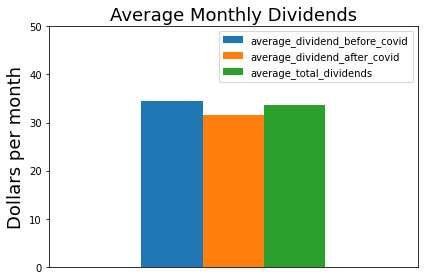

In [64]:
# Create the bar chart
#f, ax = plt.subplots(figsize=(5,5)) 
plt.xdata = average_dividend_df.plot.bar()

# Setup the title and labels
# plt.xlabel('Average Monthly Dividends', fontsize=18)
plt.ylabel('Dollars per month', fontsize=18)

# plt.yticks([])
plt.xticks([])
plt.title('Average Monthly Dividends', fontsize=18)

# Set the y limit
plt.ylim(0,50)
plt.tight_layout()
plt.savefig("Images/Averages_Dividends.png")

# Show the chart
plt.show()

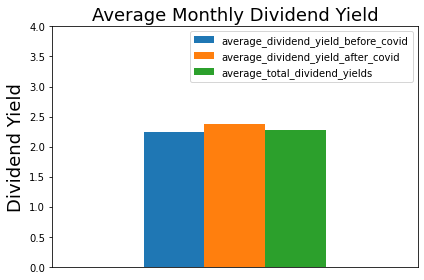

In [65]:
# Create the bar chart
#f, ax = plt.subplots(figsize=(5,5)) 
plt.xdata = average_yield_dividend_df.plot.bar()

# Setup the title and labels
# plt.xlabel('Average Monthly Dividends', fontsize=18)
plt.ylabel('Dividend Yield', fontsize=18)

# plt.yticks([])
plt.xticks([])
plt.title('Average Monthly Dividend Yield', fontsize=18)

# Set the y limit
plt.ylim(0,4)
plt.tight_layout()

plt.savefig("Images/Averages_Dividend_Yields.png")
# Show the chart
plt.show()

In [66]:
for index,dividend_stock in monthly_dividends_df.iterrows():
    print(index,dividend_stock)
    for column in dividend_columns_before_covid:
        print(column,dividend_stock[column])
   
    for column in dividend_columns_after_covid:
        print(column,dividend_stock[column])
    break

229 symbol                                       CLM
frequency                                      M
201801_open                                15.52
201802_open                                16.08
201803_open                                15.55
                                         ...    
average_dividend_after_covid              0.1853
average_total_dividends                    0.209
average_dividend_yield_before_covid    0.0172489
average_dividend_yield_after_covid     0.0178095
average_total_dividend_yields          0.0174046
Name: 229, Length: 188, dtype: object
201801_dividend 0.2365
201802_dividend 0.2365
201803_dividend 0.2365
201804_dividend 0.2365
201805_dividend 0.2365
201806_dividend 0.2365
201807_dividend 0.2365
201808_dividend 0.2365
201809_dividend 0.2365
201810_dividend 0.2365
201811_dividend 0.2365
201812_dividend 0.2365
201901_dividend 0.2053
201902_dividend 0.2053
201903_dividend 0.2053
201904_dividend 0.2053
201905_dividend 0.2053
201906_dividend 0.2053
20190

# by average_dividend_before_covid

In [67]:
monthly_dividends_df = monthly_dividends_df.sort_values(by='average_dividend_before_covid',ascending=[False])
monthly_dividends_df.loc[:,['symbol','average_dividend_before_covid','average_dividend_after_covid','average_total_dividends']].head(10)

,symbol,average_dividend_before_covid,average_dividend_after_covid,average_total_dividends
689,EMB,0.407012,0.35115,0.391494
2427,EPR,0.312692,0.07650,0.247083
776,VCLT,0.286412,0.29604,0.289086
555,VWOB,0.262058,0.28380,0.268097
2497,SLG,0.258558,0.29500,0.268681
673,EMCB,0.237808,0.25750,0.243278
2560,O,0.223904,0.23335,0.226528
852,VCIT,0.223258,0.21443,0.220806
1161,TLT,0.220565,0.20358,0.215847
229,CLM,0.218115,0.18530,0.209000


In [68]:
monthly_dividends_df = monthly_dividends_df.sort_values(by='average_dividend_before_covid',ascending=[False])
monthly_dividends_df.loc[:,['symbol','average_dividend_before_covid']].head(10)

,symbol,average_dividend_before_covid
689,EMB,0.407012
2427,EPR,0.312692
776,VCLT,0.286412
555,VWOB,0.262058
2497,SLG,0.258558
673,EMCB,0.237808
2560,O,0.223904
852,VCIT,0.223258
1161,TLT,0.220565
229,CLM,0.218115


# by average_dividend_after_covid

In [69]:
monthly_dividends_df = monthly_dividends_df.sort_values(by='average_dividend_after_covid',ascending=[False])
monthly_dividends_df.loc[:,['symbol','average_dividend_before_covid','average_dividend_after_covid','average_total_dividends']].head(10)

,symbol,average_dividend_before_covid,average_dividend_after_covid,average_total_dividends
689,EMB,0.407012,0.35115,0.391494
776,VCLT,0.286412,0.29604,0.289086
2497,SLG,0.258558,0.29500,0.268681
555,VWOB,0.262058,0.28380,0.268097
673,EMCB,0.237808,0.25750,0.243278
2560,O,0.223904,0.23335,0.226528
274,PDI,0.212096,0.22050,0.214431
852,VCIT,0.223258,0.21443,0.220806
940,MBB,0.208073,0.20837,0.208156
332,KBWY,0.160050,0.20603,0.172822


In [70]:
monthly_dividends_df = monthly_dividends_df.sort_values(by='average_dividend_after_covid',ascending=[False])
monthly_dividends_df.loc[:,['symbol','average_dividend_after_covid']].head(10)

,symbol,average_dividend_after_covid
689,EMB,0.35115
776,VCLT,0.29604
2497,SLG,0.29500
555,VWOB,0.28380
673,EMCB,0.25750
2560,O,0.23335
274,PDI,0.22050
852,VCIT,0.21443
940,MBB,0.20837
332,KBWY,0.20603


# by total_average_dividends

In [71]:
monthly_dividends_df = monthly_dividends_df.sort_values(by='average_total_dividends',ascending=[False])
monthly_dividends_df.loc[:,['symbol','average_dividend_before_covid','average_dividend_after_covid','average_total_dividends']].head(10)

,symbol,average_dividend_before_covid,average_dividend_after_covid,average_total_dividends
689,EMB,0.407012,0.35115,0.391494
776,VCLT,0.286412,0.29604,0.289086
2497,SLG,0.258558,0.29500,0.268681
555,VWOB,0.262058,0.28380,0.268097
2427,EPR,0.312692,0.07650,0.247083
673,EMCB,0.237808,0.25750,0.243278
2560,O,0.223904,0.23335,0.226528
852,VCIT,0.223258,0.21443,0.220806
1161,TLT,0.220565,0.20358,0.215847
274,PDI,0.212096,0.22050,0.214431


In [72]:
monthly_dividends_df = monthly_dividends_df.sort_values(by='average_total_dividends',ascending=[False])
monthly_dividends_df.loc[:,['symbol','average_total_dividends']].head(10)

,symbol,average_total_dividends
689,EMB,0.391494
776,VCLT,0.289086
2497,SLG,0.268681
555,VWOB,0.268097
2427,EPR,0.247083
673,EMCB,0.243278
2560,O,0.226528
852,VCIT,0.220806
1161,TLT,0.215847
274,PDI,0.214431


# by average_dividend_yield_before_covid

In [73]:
monthly_dividends_df = monthly_dividends_df.sort_values(by='average_dividend_yield_before_covid',ascending=[False])
monthly_dividends_df.loc[:,['symbol','average_dividend_yield_before_covid','average_dividend_yield_before_covid','average_total_dividend_yields']].head(10)

,symbol,average_dividend_yield_before_covid,average_dividend_yield_before_covid,average_total_dividend_yields
229,CLM,0.017249,0.017249,0.017405
230,CRF,0.017053,0.017053,0.017226
1455,OXLC,0.013716,0.013716,0.016199
235,EDF,0.012903,0.012903,0.013238
2431,ORC,0.012222,0.012222,0.012750
237,EDI,0.011568,0.011568,0.011938
281,GGN,0.011184,0.011184,0.011181
234,RIV,0.010209,0.010209,0.010802
398,HIE,0.010207,0.010207,0.009506
252,ZTR,0.009966,0.009966,0.010319


In [74]:
monthly_dividends_df = monthly_dividends_df.sort_values(by='average_dividend_yield_before_covid',ascending=[False])
monthly_dividends_df.loc[:,['symbol','average_dividend_yield_before_covid']].head(10)

,symbol,average_dividend_yield_before_covid
229,CLM,0.017249
230,CRF,0.017053
1455,OXLC,0.013716
235,EDF,0.012903
2431,ORC,0.012222
237,EDI,0.011568
281,GGN,0.011184
234,RIV,0.010209
398,HIE,0.010207
252,ZTR,0.009966


# by average_dividend_yield_after_covid

In [75]:
monthly_dividends_df = monthly_dividends_df.sort_values(by='average_dividend_yield_after_covid',ascending=[False])
monthly_dividends_df.loc[:,['symbol','average_dividend_yield_before_covid','average_dividend_yield_after_covid','average_total_dividend_yields']].head(10)

,symbol,average_dividend_yield_before_covid,average_dividend_yield_after_covid,average_total_dividend_yields
1452,GECC,0.009425,0.022750,0.013126
1455,OXLC,0.013716,0.022657,0.016199
229,CLM,0.017249,0.017810,0.017405
230,CRF,0.017053,0.017674,0.017226
1457,OXSQ,0.008979,0.017596,0.011373
2431,ORC,0.012222,0.014122,0.012750
235,EDF,0.012903,0.014111,0.013238
232,JQC,0.009555,0.014005,0.010791
247,ACP,0.009283,0.013215,0.010375
237,EDI,0.011568,0.012898,0.011938


In [76]:
monthly_dividends_df = monthly_dividends_df.sort_values(by='average_dividend_yield_after_covid',ascending=[False])
monthly_dividends_df.loc[:,['symbol','average_dividend_yield_after_covid']].head(10)

,symbol,average_dividend_yield_after_covid
1452,GECC,0.022750
1455,OXLC,0.022657
229,CLM,0.017810
230,CRF,0.017674
1457,OXSQ,0.017596
2431,ORC,0.014122
235,EDF,0.014111
232,JQC,0.014005
247,ACP,0.013215
237,EDI,0.012898


# by total_average_dividend_yields

In [77]:
monthly_dividends_df = monthly_dividends_df.sort_values(by='average_total_dividend_yields',ascending=[False])
monthly_dividends_df.loc[:,['symbol','average_dividend_yield_before_covid','average_dividend_yield_after_covid','average_total_dividend_yields']].head(10)

,symbol,average_dividend_yield_before_covid,average_dividend_yield_after_covid,average_total_dividend_yields
229,CLM,0.017249,0.017810,0.017405
230,CRF,0.017053,0.017674,0.017226
1455,OXLC,0.013716,0.022657,0.016199
235,EDF,0.012903,0.014111,0.013238
1452,GECC,0.009425,0.022750,0.013126
2431,ORC,0.012222,0.014122,0.012750
237,EDI,0.011568,0.012898,0.011938
1457,OXSQ,0.008979,0.017596,0.011373
281,GGN,0.011184,0.011171,0.011181
234,RIV,0.010209,0.012344,0.010802


In [78]:
monthly_dividends_df = monthly_dividends_df.sort_values(by='average_total_dividend_yields',ascending=[False])
monthly_dividends_df.loc[:,['symbol','average_total_dividend_yields']].head(10)

,symbol,average_total_dividend_yields
229,CLM,0.017405
230,CRF,0.017226
1455,OXLC,0.016199
235,EDF,0.013238
1452,GECC,0.013126
2431,ORC,0.012750
237,EDI,0.011938
1457,OXSQ,0.011373
281,GGN,0.011181
234,RIV,0.010802


# Now start working on the price change information for growth

In [79]:
#  Get the stocks that are not dividend stocks
price_dividends_df = pd.DataFrame(stocks_info_df.loc[(stocks_info_df['frequency'] == "M") | (stocks_info_df['frequency'] == "?")])
price_dividends_df

,symbol,frequency,201801_open,201802_open,201803_open,201804_open,201805_open,201806_open,201807_open,201808_open,...,202003_dividend_price_yield,202004_dividend_price_yield,202005_dividend_price_yield,202006_dividend_price_yield,202007_dividend_price_yield,202008_dividend_price_yield,202009_dividend_price_yield,202010_dividend_price_yield,202011_dividend_price_yield,202012_dividend_price_yield
229,CLM,M,15.52,16.080,15.55,15.2800,15.630,15.20,14.05,14.17,...,0.022820,0.019671,0.018131,0.018131,0.017205,0.016427,0.016427,0.016427,0.016427,0.016427
230,CRF,M,15.33,15.910,15.44,15.2000,15.560,15.13,13.95,14.07,...,0.022563,0.019501,0.018160,0.017871,0.017236,0.016283,0.016283,0.016283,0.016283,0.016283
232,JQC,M,8.22,8.110,8.10,7.9700,8.070,8.11,7.95,7.89,...,0.016226,0.014983,0.014807,0.013870,0.013776,0.013279,0.013279,0.013279,0.013279,0.013279
234,RIV,M,20.03,20.950,20.50,20.4000,20.927,21.35,20.50,19.18,...,0.014493,0.013514,0.012857,0.012129,0.012154,0.011658,0.011658,0.011658,0.011658,0.011658
235,EDF,M,15.86,16.250,15.92,15.9000,14.870,14.03,13.10,14.01,...,0.022880,0.028239,0.011080,0.011348,0.011299,0.011252,0.011252,0.011252,0.011252,0.011252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7811,ZVO,?,8.36,7.680,6.65,6.7100,5.830,6.91,6.52,13.13,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7812,ZX,?,1.23,1.291,1.07,1.1000,1.330,1.34,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7813,ZYME,?,7.69,13.280,10.76,12.2641,15.700,21.00,14.64,12.44,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7814,ZYNE,?,12.62,12.500,9.71,8.5900,10.260,10.74,9.70,6.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
print(price_columns_before_covid)
print(price_columns_after_covid)
print(price_all_columns)

['201801_price_chg', '201802_price_chg', '201803_price_chg', '201804_price_chg', '201805_price_chg', '201806_price_chg', '201807_price_chg', '201808_price_chg', '201809_price_chg', '201810_price_chg', '201811_price_chg', '201812_price_chg', '201901_price_chg', '201902_price_chg', '201903_price_chg', '201904_price_chg', '201905_price_chg', '201906_price_chg', '201907_price_chg', '201908_price_chg', '201909_price_chg', '201910_price_chg', '201911_price_chg', '201912_price_chg', '202001_price_chg', '202002_price_chg']
['202003_price_chg', '202004_price_chg', '202005_price_chg', '202006_price_chg', '202007_price_chg', '202008_price_chg', '202009_price_chg', '202010_price_chg', '202011_price_chg', '202012_price_chg']
['201801_price_chg', '201802_price_chg', '201803_price_chg', '201804_price_chg', '201805_price_chg', '201806_price_chg', '201807_price_chg', '201808_price_chg', '201809_price_chg', '201810_price_chg', '201811_price_chg', '201812_price_chg', '201901_price_chg', '201902_price_chg

In [81]:
stocks_info_df['total_growth_before_covid'] = stocks_info_df[price_columns_before_covid].sum(axis=1)
stocks_info_df['total_growth_after_covid'] = stocks_info_df[price_columns_after_covid].sum(axis=1)
stocks_info_df['total_growth'] = stocks_info_df[price_all_columns].sum(axis=1)


In [82]:
stocks_info_df[['symbol','total_growth_before_covid','total_growth_after_covid','total_growth']]

,symbol,total_growth_before_covid,total_growth_after_covid,total_growth
0,NEWT,0.6800,-0.78,-0.1000
1,CCAP,0.0000,0.00,0.0000
2,IRM,7.9800,-8.91,-0.9300
3,TRTN,3.4800,-20.69,-17.2100
4,RMR,28.4800,10.99,39.4700
...,...,...,...,...
7811,ZVO,6.9300,-1.86,5.0700
7812,ZX,-1.5790,0.00,-1.5790
7813,ZYME,-28.1459,0.91,-27.2359
7814,ZYNE,7.3000,0.00,7.3000


# by total_growth_before_covid

In [83]:
stocks_info_df = stocks_info_df.sort_values(by='total_growth_before_covid',ascending=[False])
stocks_info_df.loc[:,['symbol','total_growth_before_covid','total_growth_after_covid','total_growth']].head(10)

,symbol,total_growth_before_covid,total_growth_after_covid,total_growth
6518,PVT,17390.0550,-29.7000,17360.3550
3612,BRK.A,9774.1800,-152283.0000,-142508.8200
6927,SMI,9561.8103,0.0000,9561.8103
2322,SEB,995.4900,896.7900,1892.2800
3875,CIH,280.9800,1.7408,282.7208
3499,BH,206.4200,-128.3900,78.0300
26,ADS,178.4000,35.9000,214.3000
3975,COHR,176.6700,116.6700,293.3400
7650,WINS,170.4510,7.9900,178.4410
5779,MHK,159.2300,-26.0700,133.1600


In [84]:
stocks_info_df = stocks_info_df.sort_values(by='total_growth_before_covid',ascending=[False])
stocks_info_df.loc[:,['symbol','total_growth_before_covid']].head(10)

,symbol,total_growth_before_covid
6518,PVT,17390.0550
3612,BRK.A,9774.1800
6927,SMI,9561.8103
2322,SEB,995.4900
3875,CIH,280.9800
3499,BH,206.4200
26,ADS,178.4000
3975,COHR,176.6700
7650,WINS,170.4510
5779,MHK,159.2300


# by total_growth_after_covid

In [85]:
stocks_info_df = stocks_info_df.sort_values(by='total_growth_after_covid',ascending=[False])
stocks_info_df.loc[:,['symbol','total_growth_before_covid','total_growth_after_covid','total_growth']].head(10)

,symbol,total_growth_before_covid,total_growth_after_covid,total_growth
7349,TSLA,-303.7000,4014.21,3710.5100
2981,AAPL,-70.7536,1360.83,1290.0764
2322,SEB,995.4900,896.79,1892.2800
6131,NVR,-262.1301,370.29,108.1599
6540,QDEL,-31.1300,350.82,319.6900
3681,CACC,-43.0900,327.29,284.2000
4878,GLPG,-98.8800,294.53,195.6500
6442,POWI,-13.5200,292.81,279.2900
6623,RETA,-158.8700,255.96,97.0900
3431,AYX,-101.7000,239.63,137.9300


In [86]:
stocks_info_df = stocks_info_df.sort_values(by='total_growth_after_covid',ascending=[False])
stocks_info_df.loc[:,['symbol','total_growth_after_covid']].head(10)

,symbol,total_growth_after_covid
7349,TSLA,4014.21
2981,AAPL,1360.83
2322,SEB,896.79
6131,NVR,370.29
6540,QDEL,350.82
3681,CACC,327.29
4878,GLPG,294.53
6442,POWI,292.81
6623,RETA,255.96
3431,AYX,239.63


# by total_growth

In [87]:
stocks_info_df = stocks_info_df.sort_values(by='total_growth',ascending=[False])
stocks_info_df.loc[:,['symbol','total_growth_before_covid','total_growth_after_covid','total_growth']].head(10)


,symbol,total_growth_before_covid,total_growth_after_covid,total_growth
6518,PVT,17390.0550,-29.7000,17360.3550
6927,SMI,9561.8103,0.0000,9561.8103
7349,TSLA,-303.7000,4014.2100,3710.5100
2322,SEB,995.4900,896.7900,1892.2800
2981,AAPL,-70.7536,1360.8300,1290.0764
6540,QDEL,-31.1300,350.8200,319.6900
3975,COHR,176.6700,116.6700,293.3400
3681,CACC,-43.0900,327.2900,284.2000
3875,CIH,280.9800,1.7408,282.7208
6442,POWI,-13.5200,292.8100,279.2900


In [88]:
stocks_info_df = stocks_info_df.sort_values(by='total_growth',ascending=[False])
stocks_info_df.loc[:,['symbol','total_growth']].head(10)


,symbol,total_growth
6518,PVT,17360.3550
6927,SMI,9561.8103
7349,TSLA,3710.5100
2322,SEB,1892.2800
2981,AAPL,1290.0764
6540,QDEL,319.6900
3975,COHR,293.3400
3681,CACC,284.2000
3875,CIH,282.7208
6442,POWI,279.2900
